# **Diabetes Prediction using Machine Learning**

The dataset used in this project is the Diabetes dataset: www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Dataset Features

The dataset contains the following attributes:

1. **Pregnancies** – Number of times the patient has been pregnant

2. **Glucose** – Plasma glucose concentration (mg/dL) after a 2-hour oral glucose tolerance test

3. **BloodPressure** – Diastolic blood pressure (mm Hg)

4. **SkinThickness** – Triceps skin fold thickness (mm)

5. **Insulin** – 2-hour serum insulin (mu U/ml)

6. **BMI** – Body Mass Index (weight in kg / (height in m)²)

7. **DiabetesPedigreeFunction** – Diabetes pedigree function- A function that scores the likelihood of diabetes based on family history (genetic risk factor)

8. **Age** – Age of the patient (years)

9. **Outcome** – Class label (target variable)

    * `1`: Diabetes positive

    * `0`: Diabetes negative

# 1. Data Collection

## 1.1. Import Libraries

In [1]:
import numpy as np     # linear algebra
import pandas as pd    # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns   # data visualization
import pickle  # library for saving and loading the model

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## 1.2. Read the dataset

In [2]:
# load the dataset into a pandas dataframe, no header since no columns name
df = pd.read_csv('diabetes.csv')

## 1.3. Understand the data

In [3]:
# display first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# check the number of rows and columns
df.shape

(768, 9)

In [5]:
# get the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# display what unique value in dependent columns
df['Outcome'].unique()

array([1, 0])

In [8]:
# display how many different values are in each unique value
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
# see mean unique values for each columns
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
df.corr().Outcome.sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

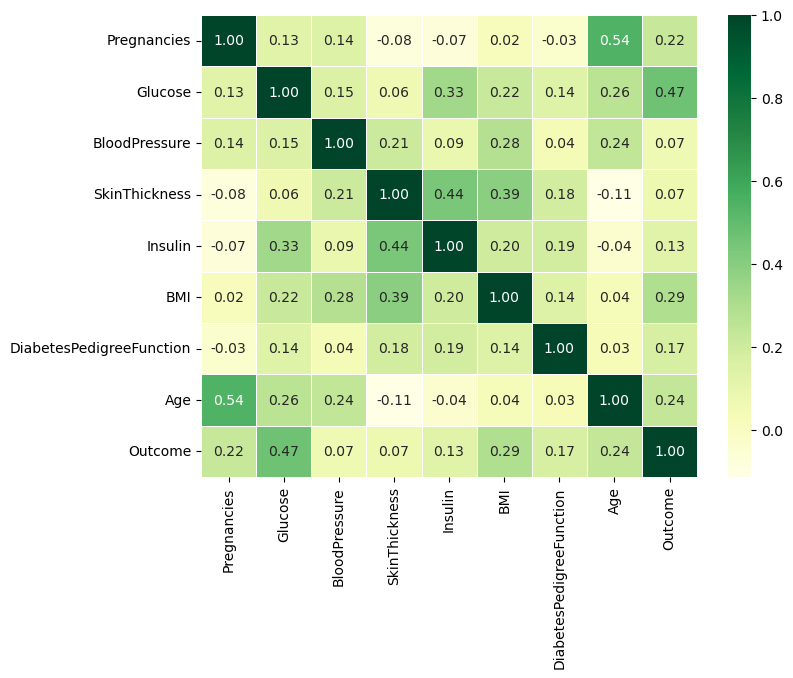

In [11]:
# display heatmap to check correlation
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), cmap="YlGn", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

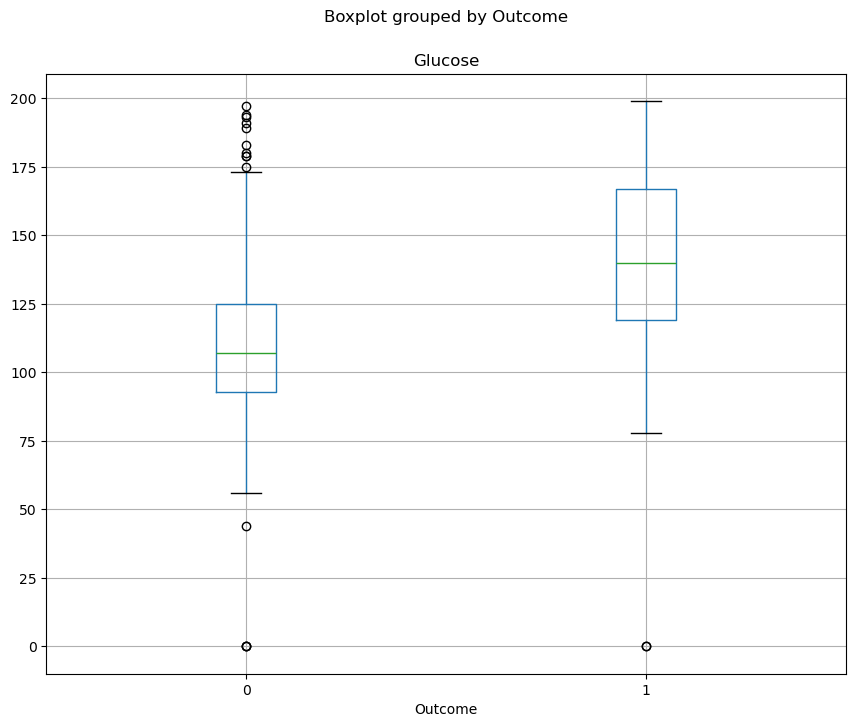

In [12]:
df.boxplot(figsize=(10,8),column='Glucose',by ='Outcome')
plt.show()

In [13]:
# separating dependent and independent data
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

# 2. Modelling

## 2.1. Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)  #scaler.fit_transform()

In [15]:
pickle.dump(scaler, open("scaler.sav", "wb"))

In [16]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X = standardized_data
y = df['Outcome']

## 2.2. Splitting to Train and Test Data

test_size=0.2, 20% of dataset goes to test set, 80% to training

stratify=y, keeps the same ratio of classes in both training and test sets (very important for classification)

random_state=2      # ensures reproducibility, controls randomness

If you set it (e.g., 2), you’ll always get the same split each time you run the code. This is good for reproducibility.

If you leave it as default (None), the split will change every time you run the code (since it uses system time as the seed).

In [18]:
# library for splitting data
from sklearn.model_selection import train_test_split

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## 2.3. Model Training

### Support Vector Machine

In [20]:
# You do not need to run this cell Gridsearch for best params
""" param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print(grid.best_score_) """

' param_grid = {\n    \'C\': [0.1, 1, 10, 100],\n    \'gamma\': [1, 0.1, 0.01, 0.001],\n    \'kernel\': [\'rbf\', \'poly\', \'sigmoid\', \'linear\']\n}\ngrid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)\ngrid.fit(X_train, y_train)\nprint("Best Params:", grid.best_params_)\nprint(grid.best_score_) '

In [21]:
# set up the model according to best params
model_svc = svm.SVC(kernel= 'linear')

In [22]:
# train the Support Vector Machine Classifier
model_svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 2.4. Model Evaluation

In [23]:
# library to evaluate model
from sklearn.metrics import accuracy_score

# accuracy on training data
X_train_prediction_svc = model_svc.predict(X_train)
training_data_accuracy_svc = accuracy_score(X_train_prediction_svc, y_train)

print('Accuracy on training data for SVC: ', training_data_accuracy_svc)

# accuracy on test data
X_test_prediction_svc = model_svc.predict(X_test)
test_data_accuracy_svc = accuracy_score(X_test_prediction_svc, y_test)

print('Accuracy on test data for SVC: ' , test_data_accuracy_svc)

Accuracy on training data for SVC:  0.7866449511400652
Accuracy on test data for SVC:  0.7727272727272727


# 3. Predictive System

In [24]:
input_data = (1,187,68,39,304,37.7,0.254,41)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

# get prediction
prediction = model_svc.predict(std_data)
print(prediction)

[1]


In [25]:
if prediction== 0:
    print('The person is non-diabetic')
else:
    print('The person is diabetic')

The person is diabetic


# 4. Model Deploying

## 4.1. Save the trained model

In [26]:
# save the trained model
filename = 'trained_model_diabetees.sav'
pickle.dump(model_svc, open(filename, 'wb'))

# load the saved model
loaded_model = pickle.load(open('trained_model_diabetees.sav', 'rb'))